In [17]:
from pylab import *
%matplotlib inline

In [18]:
def f(x, omega =1.):
    return sin(x*omega)

def g(h_de_x,x, args = []):
    if len([args]) == 0:
        return exp(-x)*h_de_x(x)
    else:
        return exp(-x)*h_de_x(x,args)

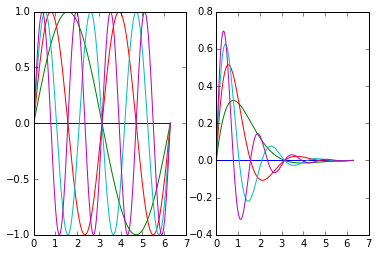

In [19]:
x = linspace(0,2*pi,200)
for i in range(5):
    subplot(121)
    plot(x,f(x,i))
    r = f(x,i)
    subplot(122)
    plot(x,g(f,x,i))
show()

In [20]:
def int_rk4(ec,p_ini,x, args = 0,h=0.001):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    
    if args == 0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.0)*(k1+2*k2+2*k3+k4)
        return tiempos,sol
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i], args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
            sol[i+1,:] = sol[i,:] + (h/6.0)*(k1+2*k2+2*k3+k4)
        return tiempos,sol

Consideramos ahora el caso de un tiro parabólico con resistencia al aire. La resistencia por la fricción provoca una aceleración que esta dada por: $$\dot{\vec{u}}=-\frac{g}{m}\hat{j}-\frac{f}{m}\frac{\vec{u}}{||\vec{u}||}$$

In [21]:
def ec_mov(r_v, t, fric = 0., g = 9.81, m = 1.):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0.:
        dvx = 0.
        dvy = -g/m
    else:
        dvx = -fric([r_v[2], r_v[3]])[0]
        dvy = -g/m -fric([r_v[2], r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

def fricNul(v):
    return array([0,0])
def fricV1(v, gamma = 0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])
def fricV2(v, gamma = 0.1):
    norma = sqrt(v[0]**2+v[1]**2)
    f_x = gamma*norma*v[0]
    f_y = gamma*norma*v[1]
    return array([f_x,f_y])

In [22]:
def movPlaneta(x,t):
    r = sqrt(x[0]**2 + x[1]**2)
    drx = x[2]
    dry = x[3]
    dvx = -x[0]/r**3
    dvy = -x[1]/r**3
    return array([drx,dry,dvx,dvy])

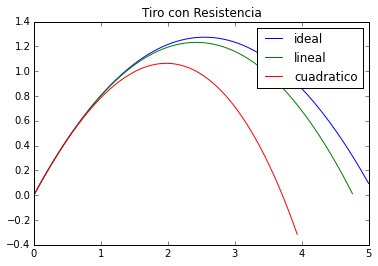

In [23]:
p = [0,0,5,5]
t,sol_id = int_rk4(ec_mov, p, [0,1])
plot(sol_id[:,0], sol_id[:,1],label="ideal")
t,sol_fr = int_rk4(ec_mov, p, [0,1], fricV1)
plot(sol_fr[:,0], sol_fr[:,1], label = "lineal")
t,sol_fr = int_rk4(ec_mov, p, [0,1], fricV2)
plot(sol_fr[:,0], sol_fr[:,1], label = "cuadratico")
title('Tiro con Resistencia')
legend()
show()

Ahora deseamos hallar el punto donde la solución cruza el eje x (y=0) para hacer un rebote del proyectil. 

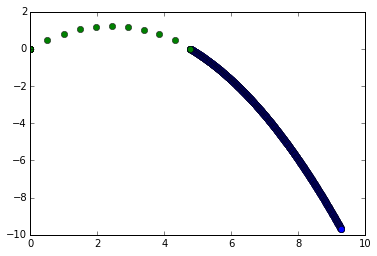

In [31]:
inicio = [0,0,5,5]
N=500
trayectoria=zeros((N,len(inicio)))
mi_dt=.1
trayectoria[0,:]=array(inicio)
for i in range(N):
    t,sol_dt=int_rk4(ec_mov,inicio,[0,mi_dt],fricV1)
    if sol_dt[-1,:][1]<0:
        break
    inicio = sol_dt[-1,:] 
    trayectoria[i+1,:]=inicio
tfv,sol_fv=int_rk4(ec_mov,inicio,[0,1])    
plot(sol_fv[:,0],sol_fv[:,1],'o')    
plot(trayectoria[:,0],trayectoria[:,1],'o')
show()